# task 1. Бинарная классификация фрагментов речи с использованием мел-кепстральных коэффициентов

Данные: https://drive.google.com/file/d/1ZiZxAN_edCpo-TsSqyCMugbvF9-s4odw/view?usp=share_link

## Импорты

In [122]:
# librosa - библиотека для анализа аудиоданных
import librosa
import librosa.display

# импортируем зависимости для возможности проигрывания аудио в ноутбуке
from IPython.display import Audio

import pandas as pd
import numpy as np

## Загрузка данных

In [123]:
import os
data_dir = '../data/speech-classify-data'
files = os.listdir(data_dir)
data = []
for file in files:
    parts = file.split('_')
    data.append({
        "filename": f'../data/speech-classify-data/{file}',
        "emotion": parts[0],
        "gender": parts[1],
    })

In [124]:
data = pd.DataFrame(data)
data

filename    emotion  gender
0      ../data/speech-classify-data/angry_female_0.wav      angry  female
1      ../data/speech-classify-data/angry_female_1.wav      angry  female
2     ../data/speech-classify-data/angry_female_13.wav      angry  female
3     ../data/speech-classify-data/angry_female_14.wav      angry  female
4     ../data/speech-classify-data/angry_female_15.wav      angry  female
..                                                 ...        ...     ...
215  ../data/speech-classify-data/stressful_male_21...  stressful    male
216  ../data/speech-classify-data/stressful_male_21...  stressful    male
217  ../data/speech-classify-data/stressful_male_21...  stressful    male
218  ../data/speech-classify-data/stressful_male_21...  stressful    male
219  ../data/speech-classify-data/stressful_male_21...  stressful    male

[220 rows x 3 columns]

## Проигрываем аудио в ноутбуке

In [125]:
sample = data['filename'][20]
audio_data, sample_rate = librosa.load(sample)
sample_rate

22050

In [126]:
Audio(data['filename'][20])

Можем также посмотреть на форму волны для этого файла.

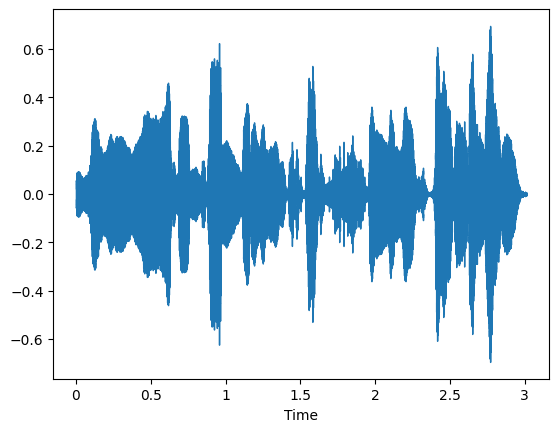

In [127]:
librosa.display.waveshow(y=audio_data, sr=sample_rate);

## Извлечение признаков из данных (мел-кепстральные коэффициенты)

Получаем множества мел-кепстральных коэффициентов (https://habr.com/ru/post/140828/)

In [128]:
librosa.feature.mfcc(y=audio_data, n_mfcc=12, sr=sample_rate)

array([[-330.33765  , -365.90366  , -390.05847  , ..., -407.90027  ,
        -439.48688  , -464.7132   ],
       [ 109.62433  ,   98.91083  ,   68.86694  , ...,  120.022125 ,
         114.63898  ,   97.08864  ],
       [  55.125412 ,   67.08864  ,   61.435272 , ...,   55.784676 ,
          50.203274 ,   45.235916 ],
       ...,
       [   5.854821 ,   11.199451 ,   14.923432 , ...,   11.386288 ,
           8.77359  ,    7.57579  ],
       [ -10.841536 ,  -12.018177 ,   -4.6759505, ...,  -17.787693 ,
         -11.809843 ,   -3.4646504],
       [   1.4297395,    2.4207304,   10.960621 , ...,  -18.494003 ,
         -16.145212 ,   -6.7783566]], dtype=float32)

Возьмем среднее значение в каждом множестве - полученные 12 чисел характеризуют аудиосигнал.

In [129]:
sample_data = np.mean(librosa.feature.mfcc(y=audio_data, n_mfcc=12, sr=sample_rate), axis=1)

In [130]:
sample_data

array([-269.9351   ,   79.257545 ,   16.68782  ,   13.445988 ,
          0.9208302,   -2.4439614,  -20.517729 ,   -8.41357  ,
         -9.784509 ,    7.4784207,  -25.465614 ,   10.071773 ],
      dtype=float32)